In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
# Data Preprocessing (Minimal Version)
# Drop irrelevant columns. Check if they exist in the DataFrame first
columns_to_drop = ['ID', 'Customer_ID', 'Name', 'SSN', 'Month']

# Check for existence and drop only existing columns
existing_columns = [col for col in columns_to_drop if col in train_df.columns]
train_df = train_df.drop(columns=existing_columns)

# Select only numeric columns for median imputation
numeric_cols = train_df.select_dtypes(include=['number']).columns

# Fill missing values in numeric columns with the median
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].median())

In [ ]:
# Encode categorical features
le = LabelEncoder()
for col in train_df.select_dtypes(include=['object']).columns:
    train_df[col] = le.fit_transform(train_df[col].astype(str))

In [ ]:
# Splitting dataset into features (X) and target (y)
X = train_df.drop(columns=['Credit_Score'])  # Replace 'Credit_Score' with the actual target column
y = train_df['Credit_Score']

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Prediction
y_pred = model.predict(X_val)

# Model Evaluation
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_val, y_pred))

In [ ]:
# Data Preprocessing (Minimal Version)
# Drop irrelevant columns. Check if they exist in the DataFrame first
columns_to_drop = ['ID', 'Customer_ID', 'Name', 'SSN', 'Month']

# Check for existence and drop only existing columns
existing_columns = [col for col in columns_to_drop if col in train_df.columns]
train_df = train_df.drop(columns=existing_columns)

# Select only numeric columns for median imputation
numeric_cols = train_df.select_dtypes(include=['number']).columns

# Fill missing values in numeric columns with the median
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].median())


# Prepare the test data
# Check for existence and drop only existing columns in test_df
existing_columns = [col for col in columns_to_drop if col in test_df.columns]
test_df = test_df.drop(columns=existing_columns)

# Select only numeric columns for median imputation in test_df
numeric_cols_test = test_df.select_dtypes(include=['number']).columns

# Fill missing values in numeric columns with the median
test_df[numeric_cols_test] = test_df[numeric_cols_test].fillna(test_df[numeric_cols_test].median())


# Encode categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit LabelEncoder on all unique values from both train and test
for col in train_df.select_dtypes(include=['object']).columns:
    # Combine unique values from both dataframes
    all_values = pd.concat([train_df[col], test_df[col]]).unique()
    # Fit the encoder on all unique values
    le.fit(all_values.astype(str))
    # Transform both train and test data
    train_df[col] = le.transform(train_df[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))

<ipython-input-18-d121b689d3b4>:6: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train.csv')


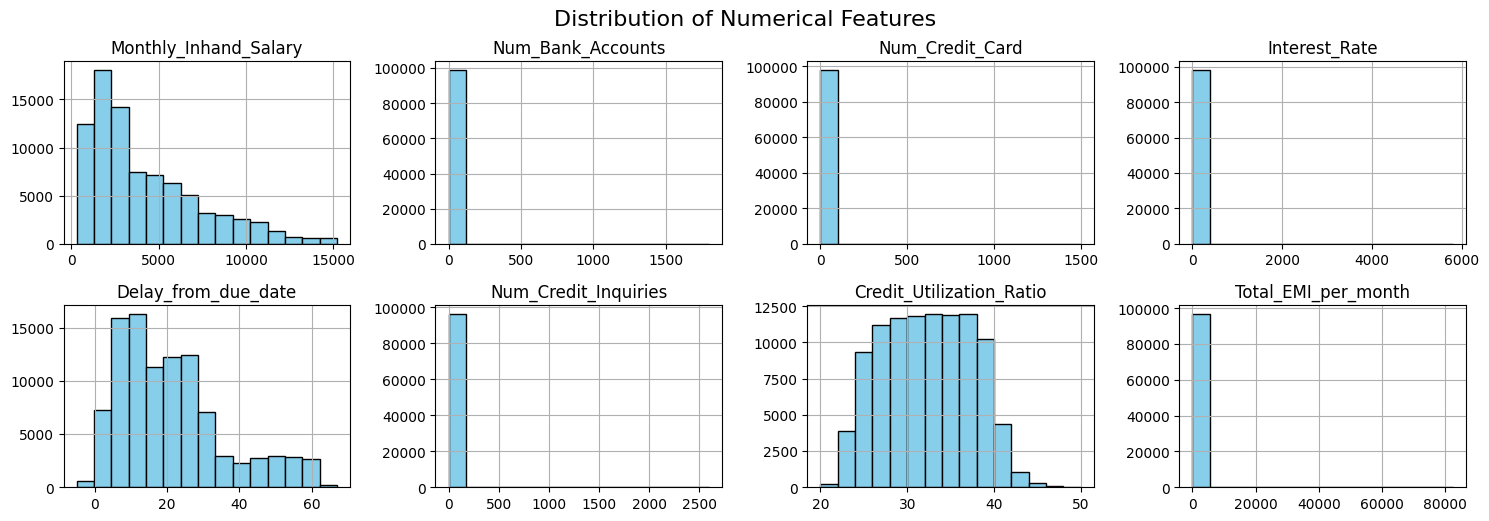

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_csv('train.csv')

# Distribution of Numerical Features
def plot_numerical_distributions(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(4, 4), color='skyblue', edgecolor='black')
    plt.suptitle('Distribution of Numerical Features', fontsize=16)
    plt.tight_layout()
    plt.show()

# Call the functions for visualization
plot_numerical_distributions(train_df)

In [ ]:
def get_column_details(df, column_name):
  print(f"Column: {column_name}")
  print(f"Data Type: {df[column_name].dtype}")
  print(f"Number of Unique Values: {df[column_name].nunique()}")
  print(f"Missing Values: {df[column_name].isnull().sum()}")
  print(f"Value Counts:\n{df[column_name].value_counts()}")

def plot_countplot(df, column_name, user_friendly_name):
  plt.figure(figsize=(8, 5))
  sns.countplot(data=df, x=column_name)
  plt.title(f'Distribution of {user_friendly_name}', fontsize=14)
  plt.xlabel(user_friendly_name, fontsize=12)
  plt.ylabel('Count', fontsize=12)
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

  def plot_stacked_bar(df, column_name, hue_column):
    plt.figure(figsize=(8, 5))
   # Use crosstab to get counts for each combination
    ct = pd.crosstab(df[column_name], df[hue_column])
  # Plot the stacked bar chart
    ct.plot(kind='bar', stacked=True)
    plt.title(f'Distribution of {hue_column} by {column_name}', fontsize=14)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=hue_column)
    plt.tight_layout()
    plt.show()

Column: Credit_Score
Data Type: object
Number of Unique Values: 3
Missing Values: 0
Value Counts:
Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


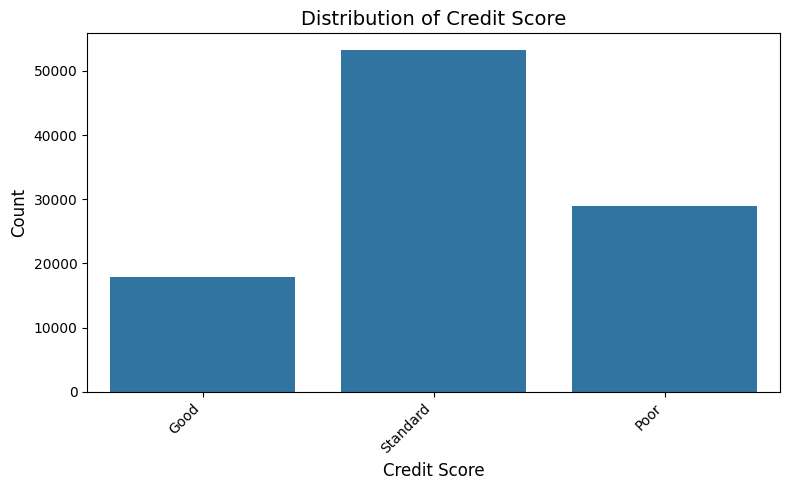

In [ ]:
column_name = 'Credit_Score'
user_friendly_name = 'Credit Score'
# Get Details
get_column_details(df_train, column_name)
# Plot Graph
plot_countplot(df_train, column_name, user_friendly_name)

Column: Month
Data Type: object
Number of Unique Values: 8
Missing Values: 0
Value Counts:
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

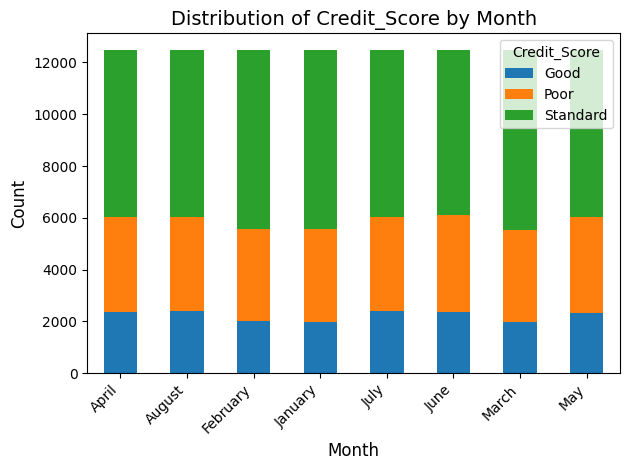

In [ ]:
column_name = 'Month'
#Get Details
get_column_details(df_train,column_name)
#Plot Distrbution with Credit_Score
plot_stacked_bar(df_train,column_name,'Credit_Score')

<ipython-input-39-8cab59cb6c21>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Month', y='Credit_Score', palette='Blues_d', ci=None)
<ipython-input-39-8cab59cb6c21>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Month', y='Credit_Score', palette='Blues_d', ci=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future versio

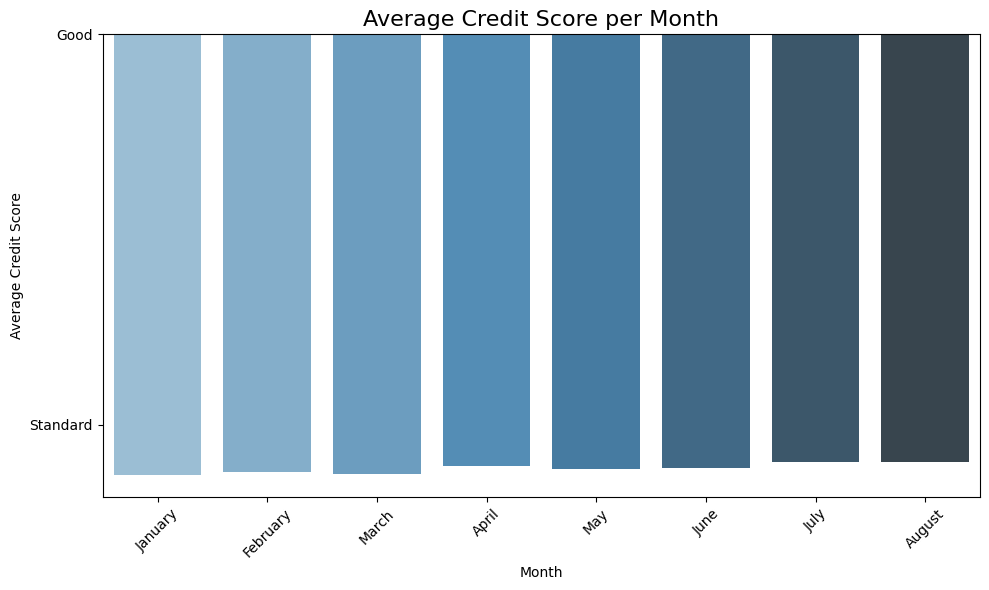

In [ ]:
# 1. Bar Plot: Average Credit Score per Month
def plot_avg_credit_score_per_month(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x='Month', y='Credit_Score', palette='Blues_d', ci=None)
    plt.title('Average Credit Score per Month', fontsize=16)
    plt.xlabel('Month')
    plt.ylabel('Average Credit Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the functions to generate the visualizations
plot_avg_credit_score_per_month(train_df)